In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
data.duplicated().sum()


0

***1. Data Manipulation:***

In [ ]:
#a)Extract the 5th column and store it in ‘customer_5

customer_5 = data.iloc[:, 4]
customer_5


,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [ ]:
#b.Extract the 15th column and store it in ‘customer_15’
customer_15 = data.iloc[:, 14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [ ]:
#Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic

# Use square brackets for boolean indexing instead of parentheses
senior_male_electronic = data[(data['gender']=='Male') & (data['PaymentMethod']=='Electronic check') & (data['SeniorCitizen']==1)]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [ ]:
# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure

customer_total_tenure = data[(data['tenure'] > 70) | (data['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [ ]:
 #Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes
 two_mail_yes  = data[(data['Contract']=='Two year')&(data['PaymentMethod']=='Mailed check')&(data['Churn']=='Yes')]
 two_mail_yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
#Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333
customer_333 = data.sample(n=333, random_state=1)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2135-RXIHG,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,Yes
2921,0564-JJHGS,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.50,829.1,Yes
6296,4023-RTIQM,Female,1,Yes,No,31,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),50.40,1580.1,No
3690,6038-GCYEC,Female,0,No,No,24,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),54.15,1240.25,Yes


In [ ]:
# Get the count of different levels from the ‘Churn’ column
churn_counts = data['Churn'].value_counts()
churn_counts

,count
Churn,
No,5174
Yes,1869


**2. Data Visualization:**

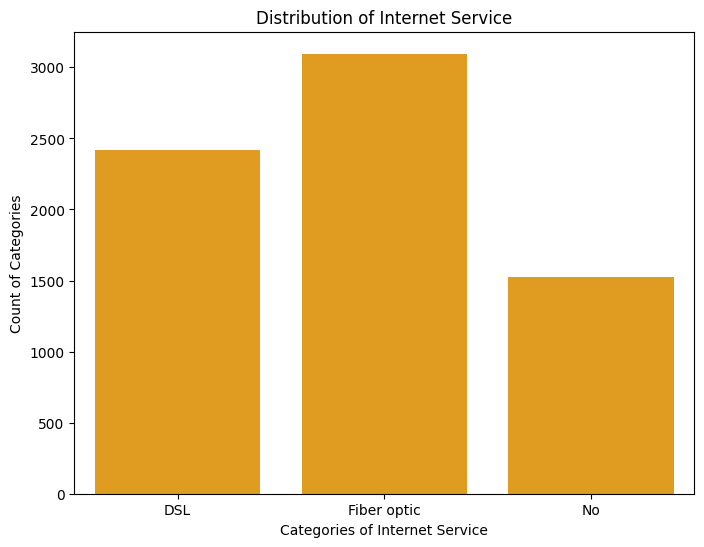

In [ ]:
# Build a bar-plot for the ‘InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange

plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=data, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

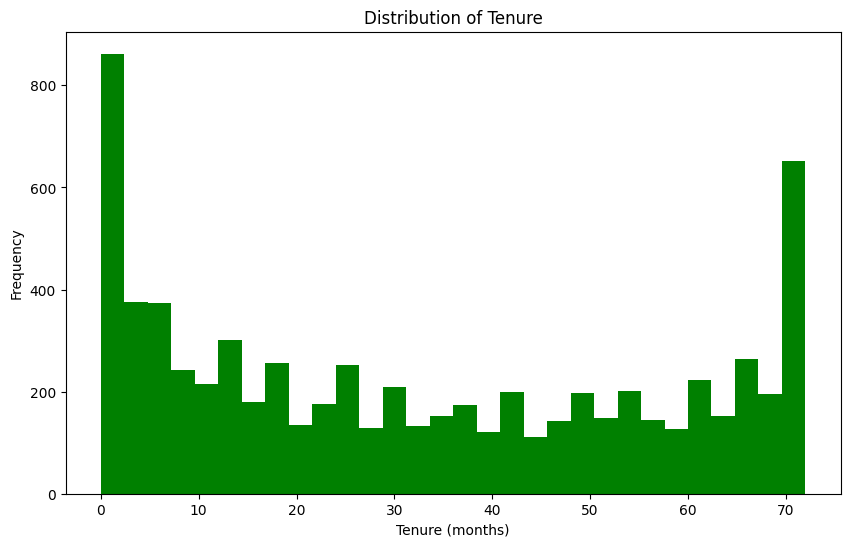

In [ ]:
# Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’

plt.figure(figsize=(10, 6))
plt.hist(data['tenure'], bins=30, color='green')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

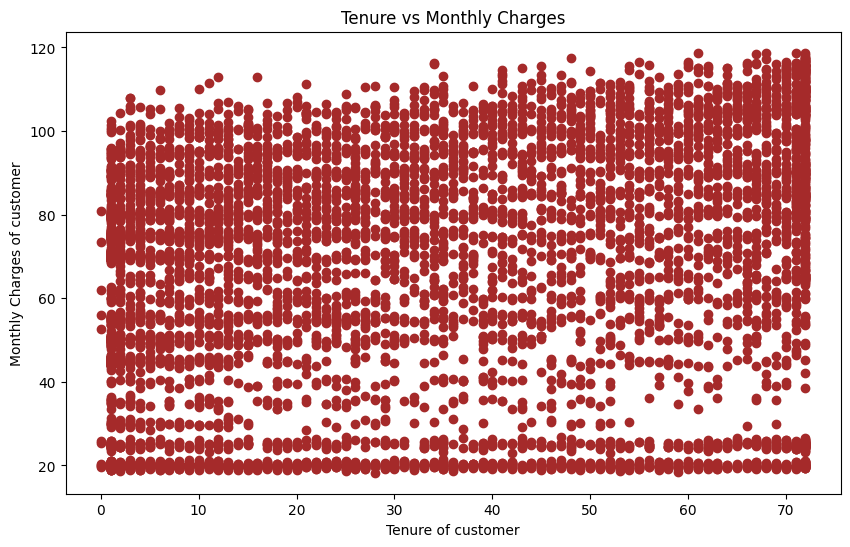

In [ ]:
#  Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#  a. Assign the points a color of ‘brown’
#  b. Set the x-axis label to ‘Tenure of customer’
#  c. Set the y-axis label to ‘Monthly Charges of customer’
#  d. Set the title to ‘Tenure vs Monthly Charges’
#  e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
#  y-axis &
#  f. ‘Contract’ on the x-axis.

#scatter-plot
plt.figure(figsize=(10, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

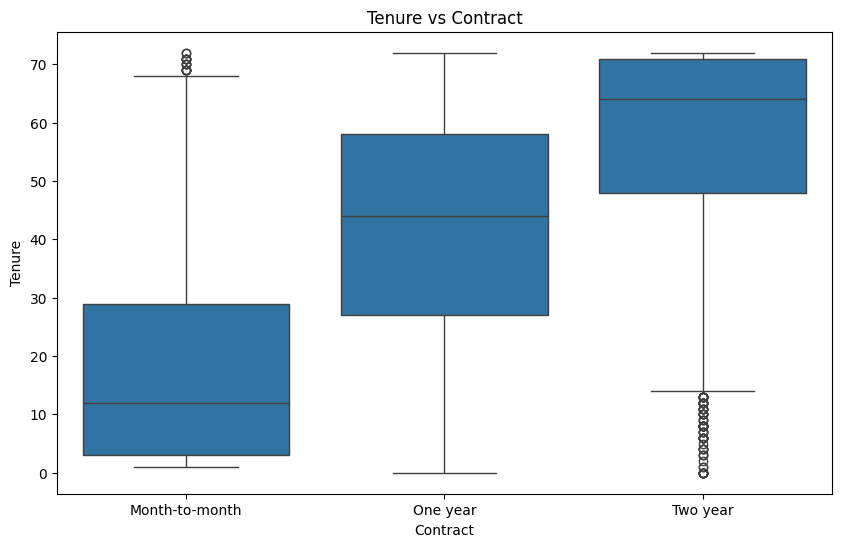

In [ ]:
 # e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=data)
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()

**4. Logistic Regression::**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#a. Divide the dataset in 65:35 ratio
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
#1 Encode the 'Churn' column to binary

le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])
print(data['Churn'].value_counts())



Churn
0    5174
1    1869
Name: count, dtype: int64


In [9]:
# Check for any missing values in 'MonthlyCharges'
data['MonthlyCharges'].isnull().sum()

0

In [ ]:
#1 Logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
X = data[['MonthlyCharges']]
y = data['Churn']

# Split the data into 65% train and 35% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Build the logistic regression model
model_simple = LogisticRegression()
model_simple.fit(X_train, y_train)

# Predict on the test set
y_predict = model_simple.predict(X_test)

# Compute the confusion matrix and accuracy score
conf_matrix_simple = confusion_matrix(y_test, y_predict)
accuracy_simple = accuracy_score(y_test, y_predict)

conf_matrix_simple, accuracy_simple

(array([[1797,    0],
        [ 669,    0]]),
 0.7287104622871047)

In [12]:
#Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
X = data[['MonthlyCharges','tenure']]
y = data['Churn']

# Split the data into 65% train and 35% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build the logistic regression model
model_simple = LogisticRegression()
model_simple.fit(X_train, y_train)

# Predict on the test set
y_predict = model_simple.predict(X_test)

# Compute the confusion matrix and accuracy score
conf_matrix_simple = confusion_matrix(y_test, y_predict)
accuracy_simple = accuracy_score(y_test, y_predict)

conf_matrix_simple, accuracy_simple

(array([[944,  92],
        [193, 180]]),
 0.7977288857345636)

**5. Decision Tree:**

In [33]:
# Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
X_dt = data[['tenure']]
y_dt = data['Churn']

#a. Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(X_dt,y_dt,test_size=0.20)

#Build the model on train set and predict the values on test set
depth=[1,2,3,4,5,6,7,8,9,10]
for max_d in depth:
  model=DecisionTreeClassifier(max_depth=max_d,random_state=58)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"the accuracy of model for max depth {max_d} is {acc}")

model=DecisionTreeClassifier(max_depth=4,random_state=58)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

the accuracy of model for max depth 1 is 0.7224982256919801
the accuracy of model for max depth 2 is 0.7295954577714692
the accuracy of model for max depth 3 is 0.7317246273953159
the accuracy of model for max depth 4 is 0.7317246273953159
the accuracy of model for max depth 5 is 0.7317246273953159
the accuracy of model for max depth 6 is 0.7317246273953159
the accuracy of model for max depth 7 is 0.7317246273953159
the accuracy of model for max depth 8 is 0.7317246273953159
the accuracy of model for max depth 9 is 0.7317246273953159
the accuracy of model for max depth 10 is 0.7317246273953159


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Build the confusion matrix and calculate the accuracy
accuracy_score(y_pred,y_test)

0.7317246273953159

<Axes: >

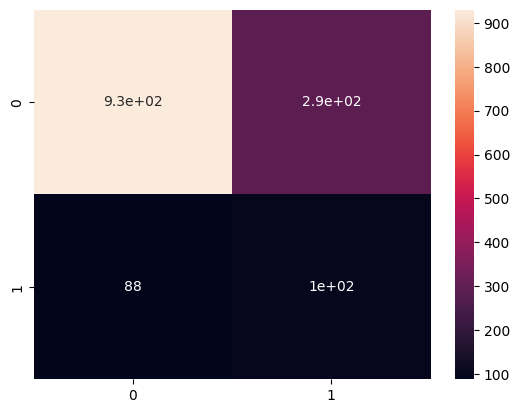

In [35]:
cf=confusion_matrix(y_pred,y_test)
sns.heatmap(cf,annot=True)

**6. Random Forest:**

In [37]:
# Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
X = data[['tenure','MonthlyCharges']]
y = data['Churn']

#a. Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
#b. Build the model on train set and predict the values on test set
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

# Prediction using RF model
rf_pred = rf_model.predict(X_test)

In [39]:
#c. Build the confusion matrix and calculate the accuracy
accuracy_score(y_test, rf_pred)

0.7605300520586843

<Axes: >

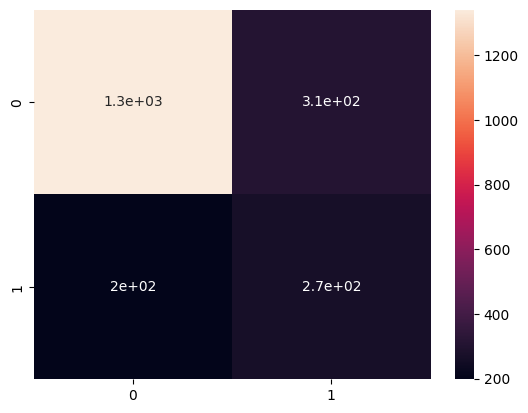

In [40]:
cf=confusion_matrix(rf_pred,y_test)
sns.heatmap(cf,annot=True)